In [0]:
import pandas as pd
import numpy as np
import matplotlib
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm

In [0]:
### Have loaded only one month of data for one district 

from google.colab import files
uploaded = files.upload()

Saving Balasore District Treasury_ Expenditure - August, 2018-19.xlsx to Balasore District Treasury_ Expenditure - August, 2018-19.xlsx


In [0]:
uploaded

{'Balasore District Treasury_ Expenditure - August, 2018-19.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xea\x16"Nv\xd5\xe2\x05\xa3\x94\x00\x00\x84=\x04\x00\x18\x00\x00\x00xl/worksheets/sheet1.xml\x94\xbd]\x93\xe4\xb8\x91\xa6{\x7f~\x85\xac\xef\xcf(\xf0E\x90c\x9aY[eFE\x06\xc9\xaa\x8a\xcc>\x1f\xd7\xbdR\xcfH\xb6\x92zL\xdd;\xb3\xe7\xdf\x9f\x8cJ83\xdd\xfd}\x81\x96.d\x92{\x90 \x90O\x91\xe0C\'\xf8\xbb\xff\xf6\xbf\xff\xfa\x97\xdf\xfc\xe7\x8f\x7f\xff\xf9\xcf?\xfd\xed_\xbe\x0b\xfft\xfa\xee7?\xfe\xed\x0f?\xfd\xf1\xcf\x7f\xfb\xf7\x7f\xf9\xee\xff\xfe\xbf>\xfd\x9f\xf3w\xbf\xf9\xf9\x97\x1f\xfe\xf6\xc7\x1f\xfe\xf2\xd3\xdf~\xfc\x97\xef\xfe\xbf\x1f\x7f\xfe\xee\xbf\xfd\xeb\xff\xf1\xbb\xff\xfa\xe9\xef\xff\xf3\xe7?\xfd\xf8\xe3/\xbfy\xdd\xc1\xdf~\xfe\x97\xef\xfe\xf4\xcb/\xff\xf1\xcf\xbf\xfd\xed\xcf\x7f\xf8\xd3\x8f\x7f\xfd\xe1\xe7\x7f\xfa\xe9?~\xfc\xdbk\xe6\xdf~\xfa\xfb_\x7f\xf8\xe5\xf5\xff\xfe\xfd\xdf\x7f\xfb\xf3\x7f\xfc\xfd\xc7\x1f\xfe\xf8m\xa3\xbf\xfe\xe5\xb7\xf1t\x9a~\xfb\xd7\x1f\xfe\xfc\xb7\xef\xde\xf6\x

In [0]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [0]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Balasore District Treasury_ Expenditure - August, 2018-19.xlsx']))

In [0]:
df.columns

Index(['Allotment Date', 'DDO Code', 'DDO Name', 'Budget Code',
       'Allotment Serial No', 'Allotment ID', 'Alloted Amount', 'Expenditure',
       'Surrender/Withdrwal', 'Deduct Amount', 'Balance', 'Department Code',
       'Department Name', 'Major Head', 'Sub Major Head', 'Minor Head',
       'Sub Minor Head', 'Detailed Head', 'Object Head'],
      dtype='object')

In [0]:
pd.options.display.float_format = "{:.2f}".format

In [0]:
### General description of columns and values of dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
Allotment Date         495 non-null datetime64[ns]
DDO Code               495 non-null object
DDO Name               495 non-null object
Budget Code            495 non-null object
Allotment Serial No    495 non-null int64
Allotment ID           495 non-null int64
Alloted Amount         495 non-null int64
Expenditure            495 non-null int64
Surrender/Withdrwal    495 non-null int64
Deduct Amount          495 non-null int64
Balance                495 non-null int64
Department Code        495 non-null object
Department Name        495 non-null object
Major Head             495 non-null int64
Sub Major Head         495 non-null int64
Minor Head             495 non-null int64
Sub Minor Head         495 non-null int64
Detailed Head          495 non-null int64
Object Head            495 non-null int64
dtypes: datetime64[ns](1), int64(13), object(5)
memory usage: 73.6+ KB


,Allotment Serial No,Allotment ID,Alloted Amount,Expenditure,Surrender/Withdrwal,Deduct Amount,Balance,Major Head,Sub Major Head,Minor Head,Sub Minor Head,Detailed Head,Object Head
count,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00
mean,2.27,2452.27,845832.33,200883.59,276.29,0.00,644672.45,2395.51,6.91,105.35,1114.03,10163.91,264.57
std,1.58,1651.03,7058277.71,1593258.49,5850.35,0.00,6863788.78,600.61,19.48,116.83,746.77,16560.34,271.59
min,1.00,290.00,56.00,0.00,0.00,0.00,0.00,2014.00,0.00,1.00,34.00,1003.00,0.00
25%,1.00,796.50,10000.00,0.00,0.00,0.00,4398.50,2202.00,1.00,101.00,731.00,1003.00,0.00
50%,2.00,3903.00,55000.00,0.00,0.00,0.00,27700.00,2210.00,2.00,102.00,1032.00,6001.00,156.00
75%,3.00,4029.50,273000.00,6105.00,0.00,0.00,190750.00,2235.00,2.00,109.00,1261.00,8001.00,506.00
max,8.00,4189.00,146954978.00,30495000.00,130000.00,0.00,146954978.00,7610.00,80.00,800.00,3309.00,78585.00,921.00


Need a CSV mapping of various Heads to Names to convert them to categorical variables. Have skipped these columns for now.

In [0]:
### Relation between various DDOs and Departments based on Balance amounts
df_subset = df[['Allotment Date','DDO Name', 'Budget Code','Alloted Amount', 'Expenditure','Surrender/Withdrwal','Balance','Department Name']]
df_subset.describe()

,Alloted Amount,Expenditure,Surrender/Withdrwal,Balance
count,495.00,495.00,495.00,495.00
mean,845832.33,200883.59,276.29,644672.45
std,7058277.71,1593258.49,5850.35,6863788.78
min,56.00,0.00,0.00,0.00
25%,10000.00,0.00,0.00,4398.50
50%,55000.00,0.00,0.00,27700.00
75%,273000.00,6105.00,0.00,190750.00
max,146954978.00,30495000.00,130000.00,146954978.00


In [0]:
display(df_subset)

,Allotment Date,DDO Name,Budget Code,Alloted Amount,Expenditure,Surrender/Withdrwal,Balance,Department Name
0,2018-08-01,Assistant Agriculture Engineer Balasore,23-2401-00-113-0379-01003-855-11-1-0,80000,0,0,80000,Department of Agriculture And Farmers' Empowe...
1,2018-08-01,Assistant Agriculture Engineer Balasore,23-2401-00-113-0379-01003-403-11-1-0,40000,0,0,40000,Department of Agriculture And Farmers' Empowe...
2,2018-08-01,Soil Chemist Balia Balasore,23-2435-01-102-1145-01003-523-11-1-0,1600,0,0,1600,Department of Agriculture And Farmers' Empowe...
3,2018-08-01,Assistant Agriculture Engineer Balasore,23-2401-00-113-0379-01003-156-11-1-0,250000,0,0,250000,Department of Agriculture And Farmers' Empowe...
4,2018-08-01,Assistant Agriculture Engineer Balasore,23-2401-00-113-0379-01003-136-11-1-0,450000,0,0,450000,Department of Agriculture And Farmers' Empowe...
5,2018-08-01,"District Education Officer, Balasore",10-2202-02-107-1009-40007-501-21-1-2,720000,0,0,720000,School and Mass Education Department
6,2018-08-01,Medical Officer Community Health Centre Baliap...,12-2210-06-101-2791-01003-523-11-1-0,7000,2280,0,4720,Health and Family Welfare Department
7,2018-08-01,District Civil Supply Officer Balasore,09-2435-01-101-0883-01003-855-11-1-0,130000,0,130000,0,Food Supplies and Consumer Welfare Department
8,2018-08-01,District Civil Supply Officer Balasore,09-2435-01-101-0883-01003-403-11-1-0,15500,0,0,15500,Food Supplies and Consumer Welfare Department
9,2018-08-01,District Civil Supply Officer Balasore,09-2435-01-101-0883-01003-136-11-1-0,107000,0,0,107000,Food Supplies and Consumer Welfare Department


In [0]:
### Correlation between numerical variables

df_subset.corr(method ='pearson') 

,Alloted Amount,Expenditure,Surrender/Withdrwal,Balance
Alloted Amount,1.00,0.23,-0.00,0.97
Expenditure,0.23,1.00,-0.01,0.01
Surrender/Withdrwal,-0.00,-0.01,1.00,-0.00
Balance,0.97,0.01,-0.00,1.00


In [0]:
####  Identify high balance combinations of DDO + Department and number of budget codes for each

df_group = df_subset.groupby(["DDO Name","Department Name"]).sum()[["Alloted Amount", "Expenditure", "Balance"]].reset_index().sort_values("Balance", ascending=False)
df_budget =  df_subset.groupby(["DDO Name","Department Name"]).count()[["Budget Code"]].reset_index().sort_values("Budget Code", ascending=False)

df_initial_bal_dist = pd.merge(df_group, df_budget, on=["DDO Name","Department Name"], how='outer').reset_index().sort_values("Balance", ascending=False)
df_initial_bal_dist




,index,DDO Name,Department Name,Alloted Amount,Expenditure,Balance,Budget Code
0,0,Project Director District Rural Development Ag...,Panchayati Raj and Drinking Water Department,198587808,0,198587808,3
1,1,Child Development Project Officer Nilgiri,Department of Woman and Child Development and ...,15758588,1661543,14097045,7
2,2,"Collector, Balasore",Revenue Department,14741832,8521047,6220785,17
3,3,District Social Welfare Officer Balasore,Department of Woman and Child Development and ...,17365946,11765819,5600127,12
4,4,"Executive Engineer, Rural Works Division-II, B...",Rural Development Department,5371000,4308,5366692,5
5,5,"Executive Engineer, RW Division, Jaleswar, Bal...",Rural Development Department,5360000,126646,5233354,4
6,6,Executive Officer Balasore Municipality Balasore,Housing and Urban Development Department,4998678,0,4998678,2
7,7,Head Master Town High School Balasore,School and Mass Education Department,6963400,2641848,4321552,11
8,8,"Block Education Officer,Nilgiri",School and Mass Education Department,8060000,4583439,3476561,2
9,9,Child Development Project Officer Baliapal Basta,Department of Woman and Child Development and ...,3464547,0,3464547,7


In [0]:
df_initial_bal_dist.describe()

,index,Alloted Amount,Expenditure,Balance,Budget Code
count,128.00,128.00,128.00,128.00,128.00
mean,63.50,3270992.22,776854.52,2493069.23,3.87
std,37.09,17850795.93,3247471.14,17556624.78,3.10
min,0.00,200.00,0.00,0.00,1.00
25%,31.75,43600.00,0.00,23375.00,1.00
50%,63.50,460700.00,10000.00,246418.50,3.00
75%,95.25,1563000.00,250690.75,1285138.50,5.00
max,127.00,198587808.00,30870000.00,198587808.00,17.00


In [0]:
bal_mean = df_initial_bal_dist['Balance'].mean()
bal_std = df_initial_bal_dist['Balance'].std()

df_test = df_initial_bal_dist.loc[df_initial_bal_dist['Balance'] >= (bal_mean+2*bal_std)]
df_test.sort_values("Balance", ascending=False)
 


,index,DDO Name,Department Name,Alloted Amount,Expenditure,Balance,Budget Code
0,0,Project Director District Rural Development Ag...,Panchayati Raj and Drinking Water Department,198587808,0,198587808,3


In [0]:
## Distribution by departments 


df_initial_bal_dist_dept = df_initial_bal_dist.groupby('Department Name').sum()[["Alloted Amount", "Expenditure", "Balance"]].reset_index().sort_values("Balance", ascending=False)
df_initial_bal_dist_dept

,Department Name,Alloted Amount,Expenditure,Balance
15,Panchayati Raj and Drinking Water Department,213065808,2522166,210543642
3,Department of Woman and Child Development and ...,47272002,13984373,33287629
20,School and Mass Education Department,34222641,13067804,21154837
18,Rural Development Department,17708000,2246489,15461511
17,Revenue Department,15221832,8566078,6655754
7,Health and Family Welfare Department,20998333,14993620,5997949
10,Housing and Urban Development Department,7693046,2694368,4998678
4,Finance Department,4334000,549715,3784285
8,Higher Education Department,34311330,31194600,3116730
1,Department of Agriculture And Farmers' Empowe...,3856225,1296842,2559383


In [0]:
df_initial_bal_dist_dept

df_test = df_initial_bal_dist_dept.loc[df_initial_bal_dist_dept['Balance'] >= (bal_mean)]
df_test

,Department Name,Alloted Amount,Expenditure,Balance
15,Panchayati Raj and Drinking Water Department,213065808,2522166,210543642
3,Department of Woman and Child Development and ...,47272002,13984373,33287629
20,School and Mass Education Department,34222641,13067804,21154837
18,Rural Development Department,17708000,2246489,15461511
17,Revenue Department,15221832,8566078,6655754
7,Health and Family Welfare Department,20998333,14993620,5997949
10,Housing and Urban Development Department,7693046,2694368,4998678
4,Finance Department,4334000,549715,3784285
8,Higher Education Department,34311330,31194600,3116730
1,Department of Agriculture And Farmers' Empowe...,3856225,1296842,2559383


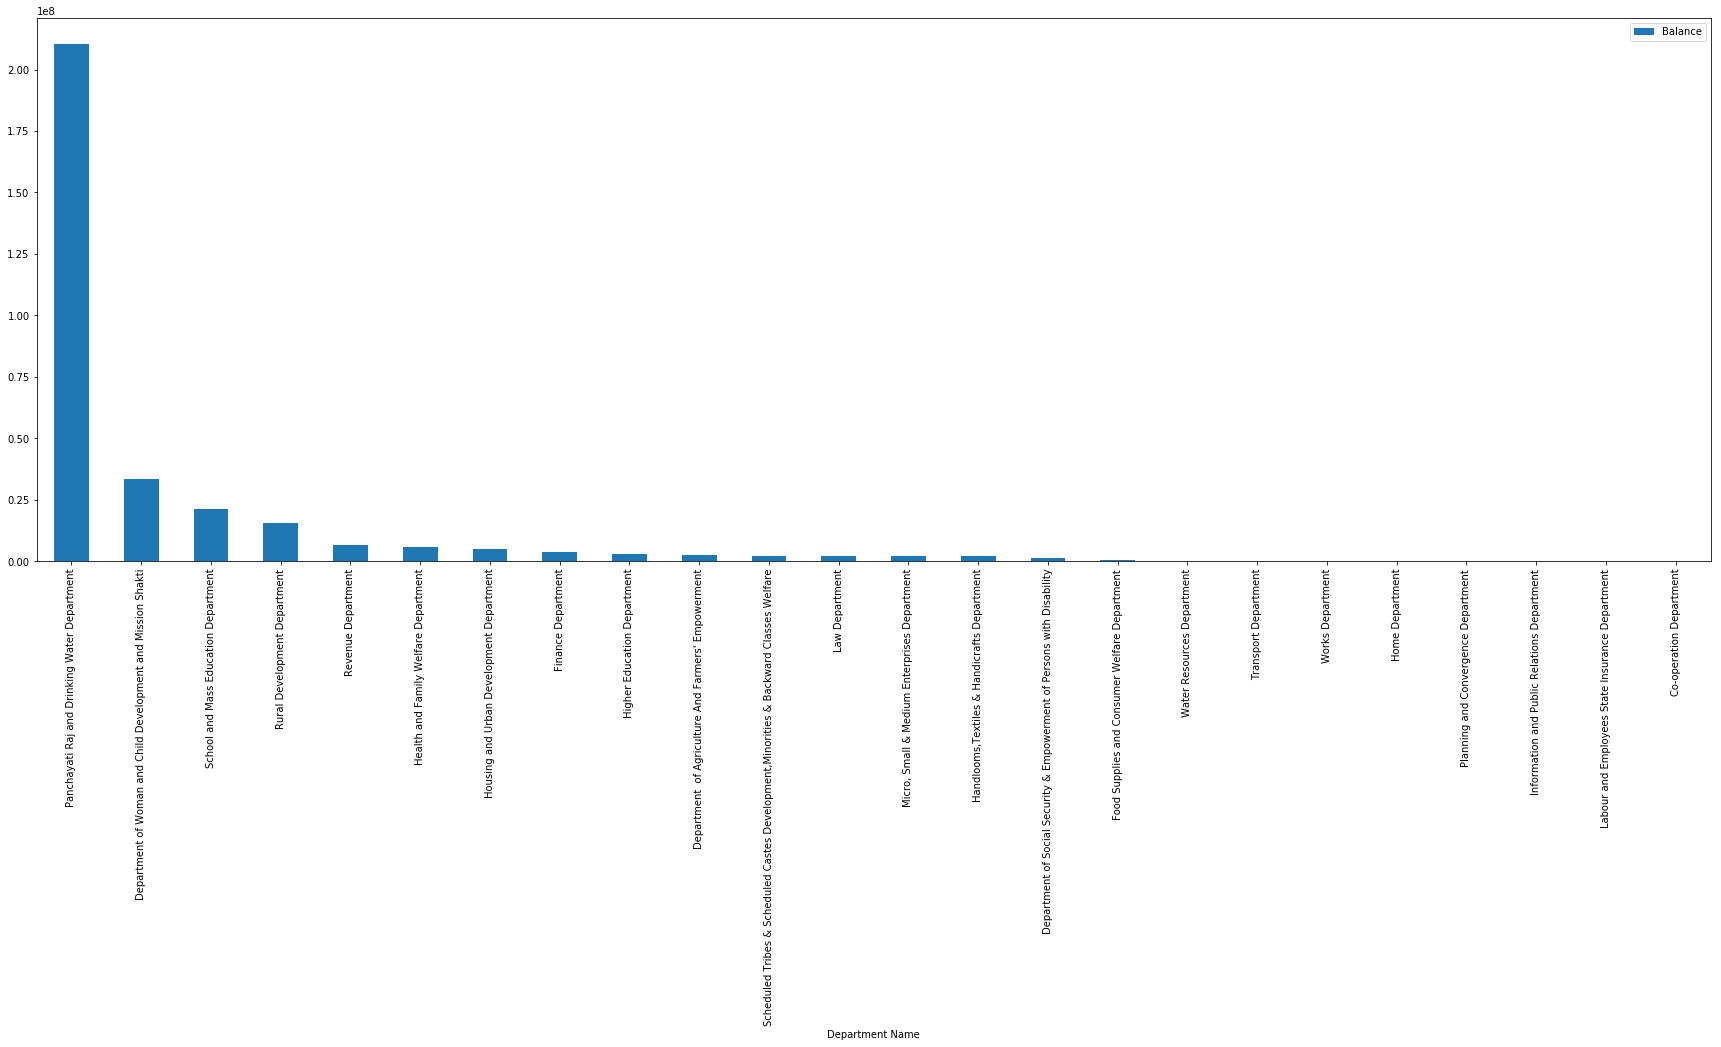

In [0]:
## Plot by department

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=30,10

df_initial_bal_dist_dept.plot(kind='bar',x='Department Name',y='Balance')

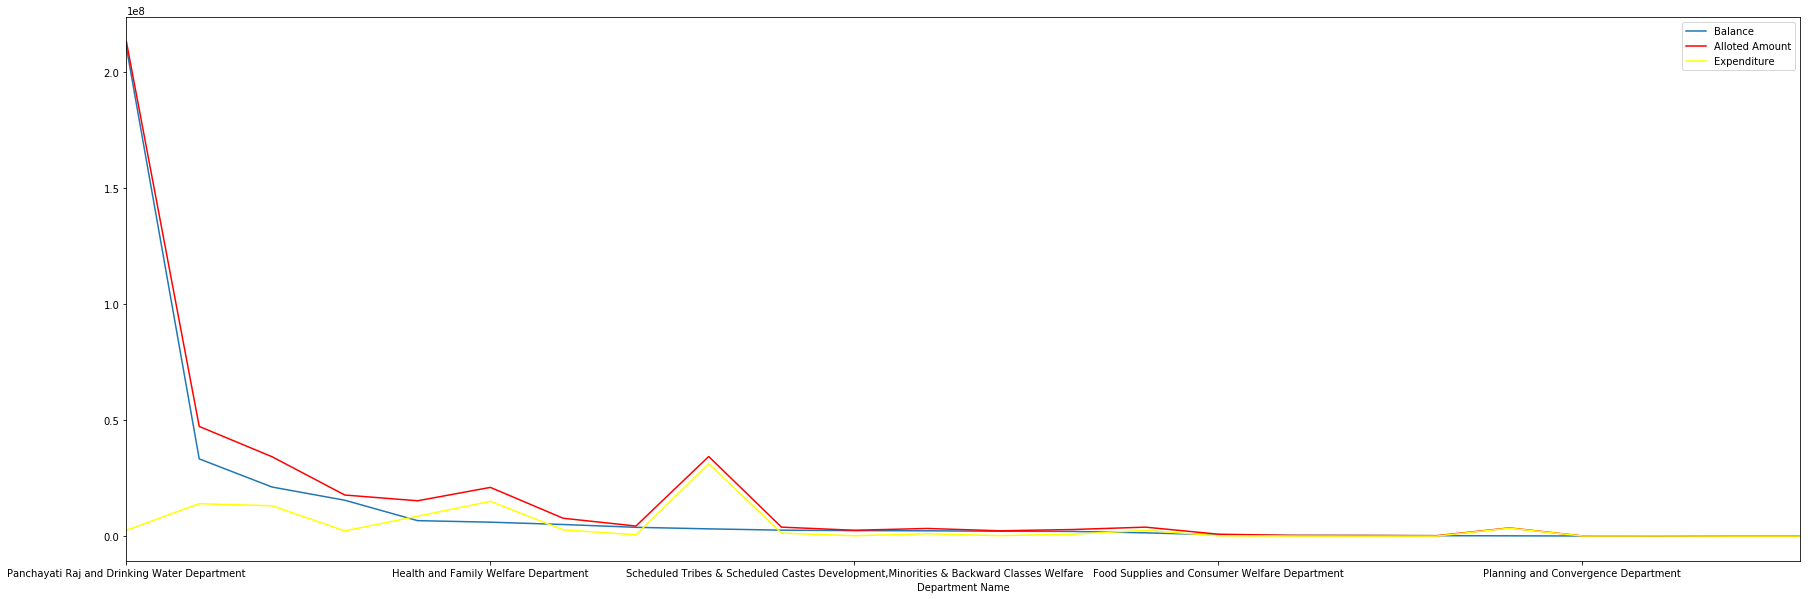

In [0]:

ax = plt.gca()

df_initial_bal_dist_dept.plot(kind='line',x='Department Name',y='Balance',ax=ax)
df_initial_bal_dist_dept.plot(kind='line',x='Department Name',y='Alloted Amount', color='red', ax=ax)
df_initial_bal_dist_dept.plot(kind='line',x='Department Name',y='Expenditure', color='yellow', ax=ax)

plt.show()

In [0]:
### By DDO 


df_initial_bal_dist_ddo = df_initial_bal_dist.groupby('DDO Name').sum()[["Alloted Amount", "Expenditure", "Balance"]].reset_index().sort_values("Balance", ascending=False)
df_initial_bal_dist_ddo

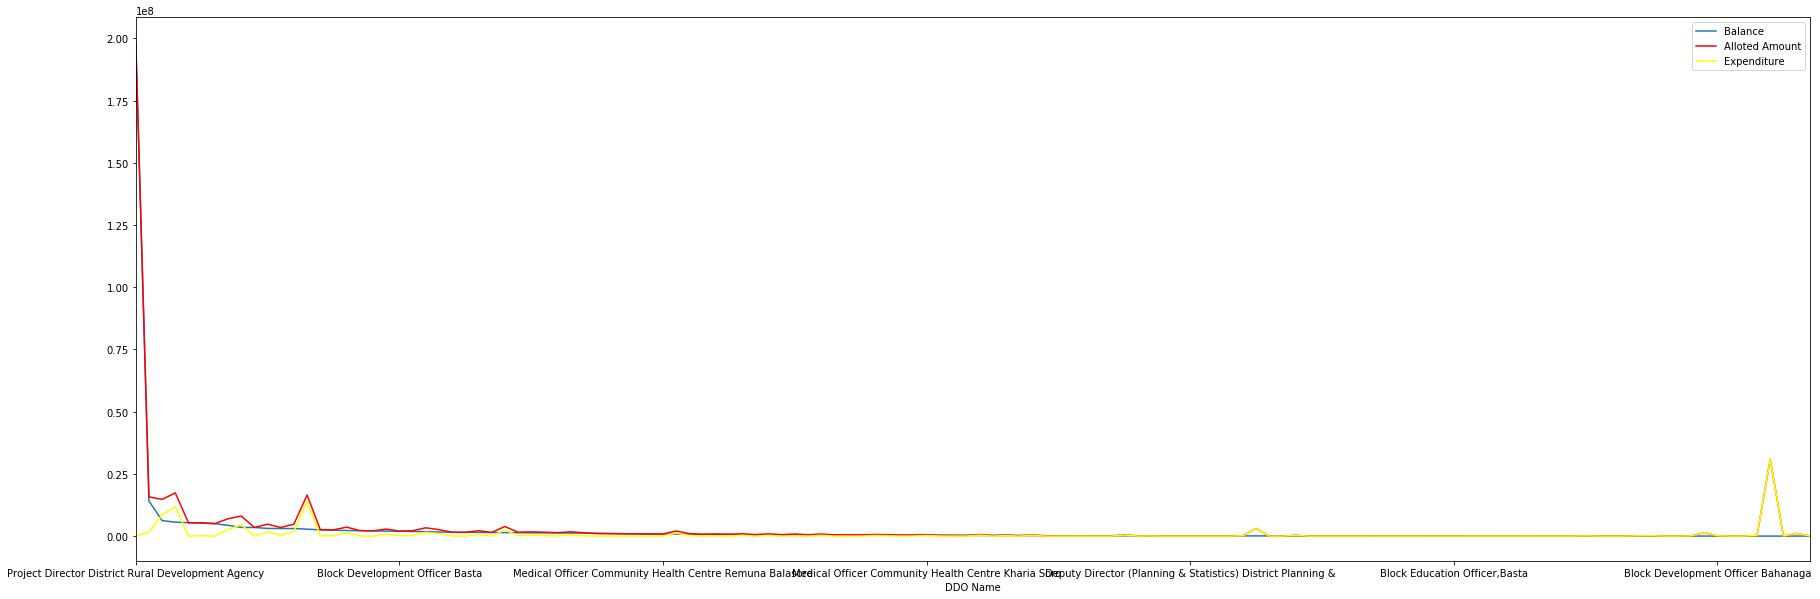

In [0]:


df_initial_bal_dist_ddo.plot(kind='line',x='DDO Name',y='Balance',ax=ax)
df_initial_bal_dist_ddo.plot(kind='line',x='DDO Name',y='Alloted Amount', color='red', ax=ax)
df_initial_bal_dist_ddo.plot(kind='line',x='DDO Name',y='Expenditure', color='yellow', ax=ax)

plt.show()

In [0]:
df_subset

,Allotment Date,DDO Name,Budget Code,Alloted Amount,Expenditure,Surrender/Withdrwal,Balance,Department Name
0,2018-08-01,Assistant Agriculture Engineer Balasore,23-2401-00-113-0379-01003-855-11-1-0,80000,0,0,80000,Department of Agriculture And Farmers' Empowe...
1,2018-08-01,Assistant Agriculture Engineer Balasore,23-2401-00-113-0379-01003-403-11-1-0,40000,0,0,40000,Department of Agriculture And Farmers' Empowe...
2,2018-08-01,Soil Chemist Balia Balasore,23-2435-01-102-1145-01003-523-11-1-0,1600,0,0,1600,Department of Agriculture And Farmers' Empowe...
3,2018-08-01,Assistant Agriculture Engineer Balasore,23-2401-00-113-0379-01003-156-11-1-0,250000,0,0,250000,Department of Agriculture And Farmers' Empowe...
4,2018-08-01,Assistant Agriculture Engineer Balasore,23-2401-00-113-0379-01003-136-11-1-0,450000,0,0,450000,Department of Agriculture And Farmers' Empowe...
5,2018-08-01,"District Education Officer, Balasore",10-2202-02-107-1009-40007-501-21-1-2,720000,0,0,720000,School and Mass Education Department
6,2018-08-01,Medical Officer Community Health Centre Baliap...,12-2210-06-101-2791-01003-523-11-1-0,7000,2280,0,4720,Health and Family Welfare Department
7,2018-08-01,District Civil Supply Officer Balasore,09-2435-01-101-0883-01003-855-11-1-0,130000,0,130000,0,Food Supplies and Consumer Welfare Department
8,2018-08-01,District Civil Supply Officer Balasore,09-2435-01-101-0883-01003-403-11-1-0,15500,0,0,15500,Food Supplies and Consumer Welfare Department
9,2018-08-01,District Civil Supply Officer Balasore,09-2435-01-101-0883-01003-136-11-1-0,107000,0,0,107000,Food Supplies and Consumer Welfare Department


In [0]:
# ### Datewise analysis

# df_subset_datewise = df_subset.groupby(["Allotment Date"]).sum()[["Alloted Amount", "Expenditure", "Balance"]].reset_index().sort_values("Allotment Date", ascending=True)

# df_subset_datewise.set_index('Allotment Date', inplace=True)

# df_subset_datewise.index = pd.to_datetime(df_subset_datewise.index)

# df_subset_datewise.plot(kind='line',x=df_subset_datewise.index,y='Balance',ax=ax)
# # df_subset_datewise.plot(kind='line',x='Allotment Date',y='Alloted Amount', color='red', ax=ax)
# # df_subset_datewise.plot(kind='line',x='Allotment Date',y='Expenditure', color='yellow', ax=ax)

# plt.show()
